## Using Machine Learning to classify emails (a practical example through Python)

### SVC (Support Vector Classification)
SVC is a nonparametric clustering algorithm that does not make any assumption on the number or shape of the clusters in the data. It works best for low-dimensional data but can be used for high dimensional data in conjunction with different techniques like PCA.

### NB (Naïve Bayes)
Naïve Bayes is a simple learning algorithm that utilizes Bayes rule together with a strong assumption that the attributes are conditionally independent, given the class.

### KNN (K-Nearest Neighbours)
K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.
**Birds of a feather flocking together.**

<a id="dataset"></a>
### Reading the Dataset and classifying categories

In [ ]:
import pandas as pd
from ops_modules.content_scanner import Scanner
import matplotlib.pyplot as plt
import pickle
import re

df = pd.read_csv('ML_testData/test_data/ML_test_October_2021.CSV', encoding="ISO-8859-1")
df.columns = ['Subject', 'Body', 'From: (Name)', 'From: (Address)',
       'From: (Type)', 'To: (Name)', 'To: (Address)', 'To: (Type)',
       'CC: (Name)', 'CC: (Address)', 'CC: (Type)', 'BCC: (Name)',
       'BCC: (Address)', 'BCC: (Type)', 'Billing Information', 'Categories',
       'Importance', 'Mileage', 'Sensitivity']
df['Subject'] = df['Subject'].str.lower()

In [ ]:
plt.rcParams['figure.figsize'] = [15, 7]

In [ ]:
obj = Scanner()
data = obj.updating_subject(df)
data.head()

ccccc:  51


,Subject,Body,From: (Name),From: (Address),From: (Type),To: (Name),To: (Address),To: (Type),CC: (Name),CC: (Address),CC: (Type),BCC: (Name),BCC: (Address),BCC: (Type),Billing Information,Categories,Importance,Mileage,Sensitivity
0,"fw: places api | fixes for rescore, requiremen...",Helloâ¦Minus the Django team â Iâll look ...,"Butcher, Billy",NaN,EX,API Consultancy and Standards,NaN,EX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
1,question | onboarding required for new pcf host,"Hello Teams,\n\n \n\nI am not sure which team ...","Wilson, Wendy",NaN,EX,API Onboarding;API Consultancy and Standards,NaN,EX;EX,NaN,NaN,EX;EX;EX;EX;EX,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
2,"api | fixes for rescore, requirement clarific...","Hi team,\n\n \n\nI have question around tutori...","Powar, Ramesh",NaN,EX,API Consultancy and Standards,NaN,EX;EX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
3,vacation days from now until the end of the year,"Hello,\r\n\r\n \r\n\r\nIf you havenât done s...","Doe, John",NaN,EX,API Consultancy and Standards,NaN,EX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
4,re: dynamic enabler,"Hey Wendy,\n\n \n\nApologies for the delayed r...","Johnson, JJ",NaN,EX,API Consultancy and Standards,NaN,EX;EX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal


In [ ]:
df_distinct = data.drop_duplicates(df.columns[0]).reset_index(drop=True)
body = df_distinct['Body']
# subject = df_distinct[df_distinct.columns[0]]
subject = df_distinct['Subject']

In [ ]:
df_distinct = df_distinct.fillna('dummy')
df_distinct.head()

,Subject,Body,From: (Name),From: (Address),From: (Type),To: (Name),To: (Address),To: (Type),CC: (Name),CC: (Address),CC: (Type),BCC: (Name),BCC: (Address),BCC: (Type),Billing Information,Categories,Importance,Mileage,Sensitivity
0,"fw: places api | fixes for rescore, requiremen...",Helloâ¦Minus the Django team â Iâll look ...,"Butcher, Billy",dummy,EX,API Consultancy and Standards,dummy,EX,dummy,dummy,dummy,dummy,dummy,dummy,dummy,dummy,Normal,dummy,Normal
1,question | onboarding required for new pcf host,"Hello Teams,\n\n \n\nI am not sure which team ...","Wilson, Wendy",dummy,EX,API Onboarding;API Consultancy and Standards,dummy,EX;EX,dummy,dummy,EX;EX;EX;EX;EX,dummy,dummy,dummy,dummy,dummy,Normal,dummy,Normal
2,"api | fixes for rescore, requirement clarific...","Hi team,\n\n \n\nI have question around tutori...","Powar, Ramesh",dummy,EX,API Consultancy and Standards,dummy,EX;EX,dummy,dummy,dummy,dummy,dummy,dummy,dummy,dummy,Normal,dummy,Normal
3,vacation days from now until the end of the year,"Hello,\r\n\r\n \r\n\r\nIf you havenât done s...","Doe, John",dummy,EX,API Consultancy and Standards,dummy,EX,dummy,dummy,dummy,dummy,dummy,dummy,dummy,dummy,Normal,dummy,Normal
4,re: dynamic enabler,"Hey Wendy,\n\n \n\nApologies for the delayed r...","Johnson, JJ",dummy,EX,API Consultancy and Standards,dummy,EX;EX,dummy,dummy,dummy,dummy,dummy,dummy,dummy,dummy,Normal,dummy,Normal


In [ ]:
category_codes = {'Service Proxy troubleshooting / APIGW' : '1',
          'Onboarding generic queries' : '2',
          'Assessment/rescore queries/early spec/exception requests' : '3',
          'Access to Tool queries' : '4',
          'API Standards queries' : '5'
          'zally' : '6',
          'Client libs' : '7',
          'Jamstack content reviewer' : '8',
          'Axon Queries' : '9',
          'Mastercard Developers Notification': '10'}

* [Preparing Data](#preparing_data)

### Scanner object

In [ ]:
# Scanning the body
# all_category_body_df -> category counter
# category_body_df -> single category counter
scanner_body_obj = Scanner()
all_category_body_df, category_body_df = scanner_body_obj.content_scan_body(body)
all_category_body_df = all_category_body_df.fillna(0)
all_category_body_df.head()

c:  0


,Assessment/rescore queries/early spec/exception requests,API Standards queries,Service Proxy troubleshooting / APIGW,Onboarding generic queries,Access to Tool queries,Zally,Jamstack content reviewer,Client libs,Axon Queries
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
category_body_df.head()

,Category
0,3
1,5
2,3
3,1
4,2


In [ ]:
total_count_body = all_category_body_df.apply(pd.value_counts)
total_count_body

,Assessment/rescore queries/early spec/exception requests,API Standards queries,Service Proxy troubleshooting / APIGW,Onboarding generic queries,Access to Tool queries,Zally,Jamstack content reviewer,Client libs,Axon Queries
0.0,6565,2907,6780,5881,6244,6834,7006,6973,6994
1.0,458,4116,243,1142,779,189,17,50,29


<AxesSubplot:>

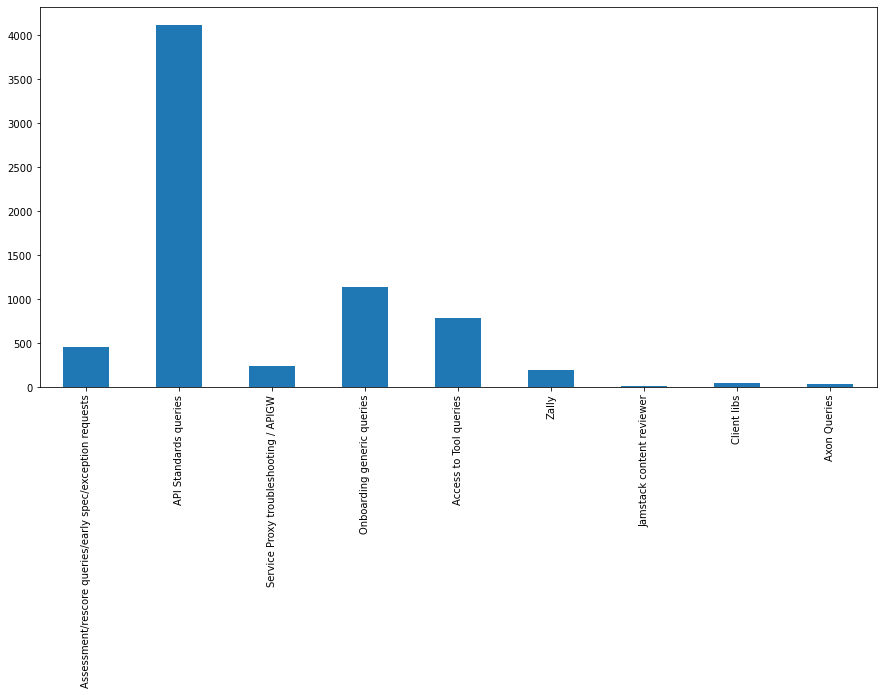

In [ ]:
total_count_body.loc[1].plot.bar()

In [ ]:
# Scanning the subject
# all_category_df -> category counter
# category_subject_df -> single category counter
scanner_subject_obj = Scanner()
all_category_subject_df, category_subject_df = scanner_subject_obj.content_scan_subject(subject)
all_category_subject_df = all_category_subject_df.fillna(0)
all_category_subject_df.head()

c:  0


,Assessment/rescore queries/early spec/exception requests,Onboarding generic queries,API Standards queries,Access to Tool queries,Jamstack content reviewer,Zally,Service Proxy troubleshooting / APIGW,Axon Queries,Client libs
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
category_subject_df.head()

,Category
0,3
1,2
2,3
3,5
4,5


In [ ]:
total_count_subject = all_category_subject_df.apply(pd.value_counts)
total_count_subject

,Assessment/rescore queries/early spec/exception requests,Onboarding generic queries,API Standards queries,Access to Tool queries,Jamstack content reviewer,Zally,Service Proxy troubleshooting / APIGW,Axon Queries,Client libs
0.0,6349,6723,1892,6638,6985,6912,6767,6915,7003
1.0,674,300,5131,385,38,111,256,108,20


<AxesSubplot:>

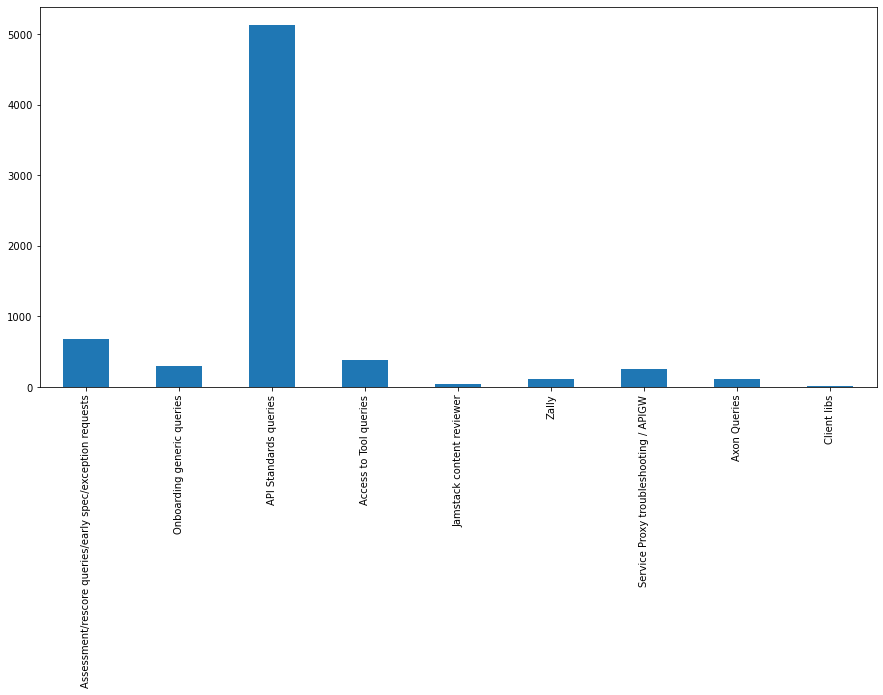

In [ ]:
total_count_subject.loc[1].plot.bar()

In [ ]:
#df3 = df2.apply(pd.value_counts)
df3 = all_category_subject_df.sum()
df3

Assessment/rescore queries/early spec/exception requests     674.0
Onboarding generic queries                                   300.0
API Standards queries                                       5131.0
Access to Tool queries                                       385.0
Jamstack content reviewer                                     38.0
Zally                                                        111.0
Service Proxy troubleshooting / APIGW                        256.0
Axon Queries                                                 108.0
Client libs                                                   20.0
dtype: float64

<a id='preparing_data'></a>
### Preparing Data / Pre-processing of Data

In [ ]:
content_parsed = df_distinct.iloc[:, :2]
content_parsed.head()

,Subject,Body
0,"fw: places api | fixes for rescore, requiremen...",Helloâ¦Minus the Django team â Iâll look ...
1,question | onboarding required for new pcf host,"Hello Teams,\n\n \n\nI am not sure which team ..."
2,"api | fixes for rescore, requirement clarific...","Hi team,\n\n \n\nI have question around tutori..."
3,vacation days from now until the end of the year,"Hello,\r\n\r\n \r\n\r\nIf you havenât done s..."
4,re: dynamic enabler,"Hey Wendy,\n\n \n\nApologies for the delayed r..."


In [ ]:
# Getting the first content from Body to visualize
content_parsed['Body'].iloc[1]

'Hello Teams,\n\n \n\nI am not sure which team can help answer the question*? I *posted* on? API C&S Helpdesk Teams channel  â\x80¦ so pasting it here as well. Please suggest.\n\n \n\n\n\n \n\nThanks,\n\nBilly Butcher\n\nLead Software Development Engineer\n\n \n\nMastercard\n\n\n\n\n\n\n\n\n\n \n\n'

In [ ]:
# Removing \r \n and extra spaces
content_parsed['Content_Parsed_1'] = content_parsed['Body'].str.replace("\r", " ")
content_parsed['Content_Parsed_1'] = content_parsed['Content_Parsed_1'].str.replace("\n", " ")
content_parsed['Content_Parsed_1'] = content_parsed['Content_Parsed_1'].str.replace("    ", " ")
content_parsed['Category'] = category_subject_df['Category']

# Removing " when quoting text
content_parsed['Content_Parsed_1'] = content_parsed['Content_Parsed_1'].str.replace('"', '')

# Lowercasing the text
content_parsed['Content_Parsed_1'] = content_parsed['Content_Parsed_1'].str.lower()

# Removing common non-relevant occuring words
ignore_words = ['mastercard', 'com', 'senior', 'software', 'engineer', 'mountainview', 'central', 'park', 'leopardstown',
                'dublin', '18', 'ireland', 'cc', 'subject', 'mailto', 'api_consultancy_and_standards', 'api_onboarding']
for ig_word in ignore_words:
    content_parsed['Content_Parsed_1'] = content_parsed['Content_Parsed_1'].str.replace(ig_word, ' ')

# Removing punctuation signs and other unwanted symbols
punctuation_signs = list("?:!.,;<>|@")

for punct_sign in punctuation_signs:
    content_parsed['Content_Parsed_1'] = content_parsed['Content_Parsed_1'].str.replace(punct_sign, ' ')

# Removing special characters
content_parsed['Content_Parsed_1'] = content_parsed['Content_Parsed_1'].replace('\*','',regex=True)
content_parsed['Content_Parsed_1'] = content_parsed['Content_Parsed_1'].replace('\?','',regex=True)

# Removing possessive nouns
content_parsed['Content_Parsed_1'] = content_parsed['Content_Parsed_1'].str.replace("'s", " ")

/var/folders/yz/nmc9qxpd275fmy5s0tx2wxqxvypjj6/T/ipykernel_26211/1515393349.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  content_parsed['Content_Parsed_1'] = content_parsed['Content_Parsed_1'].str.replace(punct_sign, ' ')


In [ ]:
content_parsed.head()

,Subject,Body,Content_Parsed_1,Category
0,"fw: places api | fixes for rescore, requiremen...",Helloâ¦Minus the Django team â Iâll look ...,helloâ¦minus the django team â iâll look ...,3
1,question | onboarding required for new pcf host,"Hello Teams,\n\n \n\nI am not sure which team ...",hello teams i am not sure which team can hel...,2
2,"api | fixes for rescore, requirement clarific...","Hi team,\n\n \n\nI have question around tutori...",hi team i have question around tutorials we ...,3
3,vacation days from now until the end of the year,"Hello,\r\n\r\n \r\n\r\nIf you havenât done s...",hello if you havenât done so already can ...,5
4,re: dynamic enabler,"Hey Wendy,\n\n \n\nApologies for the delayed r...",hey wendy apologies for the delayed response...,5


In [ ]:
# Visualizing the Body -> Content_Parsed_1
content_parsed['Content_Parsed_1'].iloc[1]

'hello teams   i am not sure which team can help answer the question  i posted on  api c&s helpdesk teams channel  â\x80¦ so pasting it here as well  please suggest     thanks   billy butcher  lead   development         '

<a id='lemmatization'></a>
### Lemmatization

In [ ]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')



------------------------------------------------------------


[nltk_data] Downloading package punkt to /Users/e107109/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/e107109/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
lemma_text_list = []

for row in range(0, len(content_parsed)):

    # Create an empty list containing lemmatized words
    lemma_list = []

    # Save the text and its words into an object
    text = content_parsed.loc[row]['Content_Parsed_1']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemma_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

    # Join the list
    lemma_text = " ".join(lemma_list)

    # Append to the list containing the texts
    lemma_text_list.append(lemma_text)

content_parsed['parsed_lemmatized_text'] = lemma_text_list

In [ ]:
content_parsed.head()

,Subject,Body,Content_Parsed_1,Category,parsed_lemmatized_text
0,"fw: places api | fixes for rescore, requiremen...",Helloâ¦Minus the Django team â Iâll look ...,helloâ¦minus the django team â iâll look ...,3,helloâ¦minus the django team â iâll look ...
1,question | onboarding required for new pcf host,"Hello Teams,\n\n \n\nI am not sure which team ...",hello teams i am not sure which team can hel...,2,hello team i be not sure which team can help...
2,"api | fixes for rescore, requirement clarific...","Hi team,\n\n \n\nI have question around tutori...",hi team i have question around tutorials we ...,3,hi team i have question around tutorials we ...
3,vacation days from now until the end of the year,"Hello,\r\n\r\n \r\n\r\nIf you havenât done s...",hello if you havenât done so already can ...,5,hello if you havenât do so already can yo...
4,re: dynamic enabler,"Hey Wendy,\n\n \n\nApologies for the delayed r...",hey wendy apologies for the delayed response...,5,hey wendy apologies for the delay response ...


In [ ]:
# Visualizing the Body -> parsed_lemmatized_text
content_parsed['parsed_lemmatized_text'].iloc[1]

'hello team   i be not sure which team can help answer the question  i post on  api c&s helpdesk team channel  â\x80¦ so paste it here as well  please suggest     thank   billy butcher  lead   development         '

<a id="stop_words"></a>
### Stop words

In [ ]:
# Stops words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/e107109/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
print(len(stop_words))
stop_words

179


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df_distinct.columns

Index(['Subject', 'Body', 'From: (Name)', 'From: (Address)', 'From: (Type)',
       'To: (Name)', 'To: (Address)', 'To: (Type)', 'CC: (Name)',
       'CC: (Address)', 'CC: (Type)', 'BCC: (Name)', 'BCC: (Address)',
       'BCC: (Type)', 'Billing Information', 'Categories', 'Importance',
       'Mileage', 'Sensitivity'],
      dtype='object')

In [ ]:
# Adding the stopwords from the TO: From: CC: column
# which is all the names

stop_words_df = pd.DataFrame({})
stop_words_df['From: (Name)'] = df_distinct['From: (Name)']
stop_words_df['To: (Name)'] = df_distinct['To: (Name)']
stop_words_df['CC: (Name)'] = df_distinct['CC: (Name)']
#stop_words_df = df_distinct.iloc[:, :2]

for column in stop_words_df:
    # Lowercasing the text
    stop_words_df[column] = stop_words_df[column].str.lower()

    # Removing punctuation signs and other unwanted symbols
    stop_words_df[column] = stop_words_df[column].str.replace('dummy', '')

    # Removing punctuation signs and other unwanted symbols
    stop_words_punctuation_signs = list(",;)(")

    for stop_words_punct_sign in stop_words_punctuation_signs:
        stop_words_df[column] = stop_words_df[column].str.replace(stop_words_punct_sign, ' ')

    # Removing special characters
    stop_words_df[column] = stop_words_df[column].replace('\*', '', regex=True)
    stop_words_df[column] = stop_words_df[column].replace('\?', '', regex=True)
    stop_words_df[column] = stop_words_df[column].replace('\+', '', regex=True)
    stop_words_df[column] = stop_words_df[column].replace('\"', '', regex=True)
    stop_words_df[column] = stop_words_df[column].replace('\{', '', regex=True)
    stop_words_df[column] = stop_words_df[column].replace('\}', '', regex=True)
    stop_words_df[column] = stop_words_df[column].replace('\[', '', regex=True)
    stop_words_df[column] = stop_words_df[column].replace('\]', '', regex=True)


/var/folders/yz/nmc9qxpd275fmy5s0tx2wxqxvypjj6/T/ipykernel_26211/1984093448.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stop_words_df[column] = stop_words_df[column].str.replace(stop_words_punct_sign, ' ')


In [ ]:
word = list()
for i in range(0, len(stop_words_df)):
    for j in stop_words_df.loc[i].values:
        word.append(j.split())
new_stop_words = [item for sublist in word for item in sublist]


stop_words_unique = set(new_stop_words) # To get unique values

In [ ]:
stop_words.extend(stop_words_unique)
remove_words = ['jamstack', 'onboarding', 'support', 'product', 'operations', 'api', 'apis', 'project',
                'architecture', 'security', 'development', 'key', 'jenkins', 'dev', 'external', 'team', 'digital',
                'helpdesk', 'axon', 'gateway', 'xmlgw', 'access', 'ping', 'strategic', 'developers', 'postgres',
                'management', 'xml', 'gw', 'service', 'dba', 'standards']
print(len(remove_words))
for w in remove_words:
    if w in stop_words:
        stop_words.remove(w)

stop_words

32


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Takes time to process 5-6 mins.
# This is to remove all the stopwords from the Body.
content_parsed['stop_words_parsed'] = content_parsed['parsed_lemmatized_text']
for stop_word in stop_words:
    print(stop_word)
    if (stop_word == '?ukasz'):
        stop_word = '\?ukasz'
    regex_stopword = r"\b" + stop_word + r"\b"
    content_parsed['stop_words_parsed'] = content_parsed['stop_words_parsed'].str.replace(regex_stopword, '')

i
me
my


/var/folders/yz/nmc9qxpd275fmy5s0tx2wxqxvypjj6/T/ipykernel_26211/2564579257.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  content_parsed['stop_words_parsed'] = content_parsed['stop_words_parsed'].str.replace(regex_stopword, '')


myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't
dolly
workaround
kirk
anthony
tavares
<vijaykumar.borkar@mastercard.com


vijay
rosano
megan
john
negi
shaikh
addressed
o'hare
serviceid
sompalli
estefanie
irfan
suggest
value
<mailto:sumit.nimkar@mastercard.com>
simmons
otherwise
/cn=recipients/cn=0b4cfde7e6b14ad186ecab35b014ff8f-e090530
agrawal
nikhita
noah
aakanksha
bhushan
/cn=recipients/cn=e031854879b71f2
'api_consultancy_and_standards@mastercard.com'
vijila
files
chirag
candee
<megan.lui@mastercard.com
pearce
<lexi.flake@mastercard.com
alexandra
issue.
<mailto:nikhil.sharma@mastercard.com>
nayak
rescore
group
tom
maloney
customizations
at
jefferson
jagtap
thakkar
amy
<sumit.nimkar@mastercard.com
feeney
kuchipudi
arijeet
sagar
sadipan
whichever
follow
<mailto:saurabh.singh@mastercard.com>
patch
chittrarasu
hold
bushke
kruse
teja
âapi
seth
<joval.aubee@mastercard.com
voelker
<diarmuid.donnelly@mastercard.com
zhang
<mailto:kshama.jha@mastercard.com>
kommepalli
doherty
<https://fusion.mastercard.int/confluence/display/samdev/fxdesk-nextgenonboardingroute>
mcguigan
jemma
joshi
see
indraneel
section.
<anan

beneficial
/cn=recipients/cn=c02fba95c75d4020a3d48c77ad0927ea-e027068
ik
ohle
/cn=recipients/cn=3de8204afbeb4b4bb7168dfc5bc7f6de-e095166
ganipineni
accessing
such
minimum
mceachin-williams
pia
/cn=recipients/cn=e9a77eede23e4cfd887b590b5dc713f1-e092190
jadeja
tammy
helm
sujitsinh
mohrlock
codacy
rojas
adhikary
franco
name
place
julie
<mailto:asif.kadiwala@mastercard.com>
available
clancy
eg.
powers
idcm-support
chiang
tyma
<mailto:siva.hari@mastercard.com>
grimberg
guarasci
gilles
computer
added
sandra
caito
1st
nagwala
dmitry
verticals
brokers
ashe
responsive
tuozzo
zone
rameshwari
debbie
/cn=recipients/cn=32a61cd1ae4246f88e4dc8f6040535e5-e070030
/cn=recipients/cn=e01928212836759
gallagher
pratik
manmay
klaus
joyson
let
/cn=recipients/cn=e41afae3791c4851ab949e884032fa02-e081143
jackets
aseef
target
later.
<mailto:ritesh.samtani@mastercard.com>
paul
here
ramesh
india
ansari
louise
sawant
blanco
<mayank.joshi@mastercard.com
rajkumar
weishaar
enhancement
dodson
<mailto:nanjunda.moorthy@ma

refer
urls
mulryan
gary
zach
nethercott
kiss
vikas
srikar
raut
matkar
nolan
/cn=recipients/cn=b01763bb64a84cc0b691d5ee38f3019b-e072023
/cn=recipients/cn=e035209
bagade
gadham
/cn=recipients/cn=b014656b4d2a879
bodman
alexia
tushar
gowda
arashanapalli
namrata
guidance.
kalshetti
venkateswaran
abrams
noë¬
button.
robocops
highlow
sakore
mathew
bandra
sakesh
dmitriy
mandira
<mailto:praveen.kamble@mastercard.com>
of
/cn=recipients/cn=e02825685a04e61
<kosta.krauth@mastercard.com
puar
/cn=recipients/cn=e024366c23058b3
/cn=recipients/cn=e048038cab
abuljadayel
viatcheslav
/payment-transaction-services.
lyons
phanindra
/cn=recipients/cn=a9418d0feeec4e6da685f889cd65e926-e072948
punnachalil
production.
set
hubert
rastogi
doesnât
eds
akshay
<mailto:mithilesh.deshpande@mastercard.com>
generate
gesualdi
harshil
lodha
hunter
sahitya
roland
krishna
proven
robin
copy
adding/updating
majumder
london
sankaran
krauth
baskar
whatâs
mids
grant
sakshi
brian
ashton
lingxin
bhakti
tadimarri
kryvoshei
bandei

oladejo
tucker
most
nandini
rane
setiawan
work-around
ahmed
mo
<michael.cruz@mastercard.com
other
coffey
philippe
step
mcapi_qa
any
stubbed/mocked
<cody.allison@mastercard.com
salman
freeman
gilmor
/cn=recipients/cn=9d464ba645bc451fa9f21184c2bab861-e067666
tijdige
tech
lovisa
duncan
sadagopan
pcf
olsson
sun
padmanaban
shubhankar
excel
production
cory
moitra
brueggemann
mithilesh
kania
shashank
<kalpana.gangaraj@mastercard.com
siddhesh
<mailto:axondev@mastercard.com>
bartoletti
clay
pranita
ops
routhier
ashwini
/cn=recipients/cn=eb3d4a7aca654de886fcd15e14b18c6a-e091937
/cn=recipients/cn=405fa80d924647c69f4d9dc7f4ae2309-e095897
vandadi
sushilkumar
<pravallika.nannapaneni@mastercard.com
/cn=recipients/cn=e0480964ec
to
/cn=recipients/cn=b07c552ca1394ad4a05a8706d0e1d280-sam_megatron
delcroix
<mailto:tammy.mcvickar@mastercard.com>
kumaran
kamatchi
tranvanba
peterson
gaadhe
kancharla
alfonso
rochan
oscar
sonarqube
lepinne
<mailto:kaushal.shetty@mastercard.com>
fahad
decryption
rakhee
papakost

murali
10577
kingdom
/cn=recipients/cn=e050000d05
jons
active
jaydeep
goh
hembrock
bhosle
craig.casey@ethoca.com
jamila
ashok
parmeet.bhatia@ethoca.com
<mailto:mystica.gooneratne@mastercard.com>
license
then.
/cn=recipients/cn=1c6c91b0bd9b40789cdb66a96ff84a24-e118108
mariusz
mocherla
tankala
specific
evans
leung
uploads
visit
/cn=recipients/cn=e055872a3f
verma
priceless
against
gori
bensam
sponsor
/cn=recipients/cn=e034897
ios/android
<mailto:abhimanyu.sharma@mastercard.com>
ishaq
pravin
sort
get
please
parmar
varun
nick
sanjana
sabrina
kitchen
naseer
cassandra
hans
/cn=recipients/cn=309386600b90418c90ff72096d0be9a0-e095561
networking
werner
yulia
nitin
identities
pla
pawar
karunakaran
ruchika
dubey
yifru
/cn=recipients/cn=9cbb7ba2d6c14f5eb2b8e4c478c7ecfc-e085269
sandbox
treitlinger
evening
effect:
lucien
saravana
nanjunda
joval
/cn=recipients/cn=f221d42352ef479487e26c4b6b44a5e8-e071012
<mailto:dollmano@amazon.com>
<mailto:ajit.chauhan@mastercard.com>
khullar
boorla
/cn=recipients/cn=6

roderick
knese
/cn=recipients/cn=b0221afa0cef4cf8b1094656b1b05c0a-e077023
varanasi
<joe.kaewbaidhoon@mastercard.com
thummalapenta
2
<https://confluence.mastercard.int/pages/viewpage.actionpageid=326677877#theapiconsultancy&standardsteam-byjoiningusinanofficehoursession>
ayodele
<nathan.langtry@mastercard.com
dalavechia
dimitrov
like
<mailto:nitin.garg@mastercard.com>
torres
connections
dhodia
angel
<abhimanyu.sharma@mastercard.com
errors
ahuja
gold
hem
/cn=recipients/cn=bjz338787d83887
3:36
jinyang
completely.
hearing
karl
das
meng
<mailto:macdickson.fernandes@mastercard.com>
general
done
walimbe
justin
ranjan
anurag
cha
11:52
opened
consumerkey
getting
:
darragh
rajashekar
<tammy.mcvickar@mastercard.com
parsai
shah
danny
<aleksander.zareba@mastercard.com
term
jessica
ravi
powelson
shepherd
parab
rajesh
endpoint
referring
shanmugam
robinson
<charlie.brady@mastercard.com
spring
<mailto:lexi.flake@mastercard.com>
deria
/cn=recipients/cn=7229d477bba74d8fb3d81f8ea1aec938-e099922
janardhana

In [ ]:
content_parsed.head()

,Subject,Body,Content_Parsed_1,Category,parsed_lemmatized_text,stop_words_parsed
0,"fw: places api | fixes for rescore, requiremen...",Helloâ¦Minus the Django team â Iâll look ...,helloâ¦minus the django team â iâll look ...,3,helloâ¦minus the django team â iâll look ...,helloâ¦minus djangoteam  iâ answer ...
1,question | onboarding required for new pcf host,"Hello Teams,\n\n \n\nI am not sure which team ...",hello teams i am not sure which team can hel...,2,hello team i be not sure which team can help...,helloteam team answer question ...
2,"api | fixes for rescore, requirement clarific...","Hi team,\n\n \n\nI have question around tutori...",hi team i have question around tutorials we ...,3,hi team i have question around tutorials we ...,hiteam question tutorials consumers ...
3,vacation days from now until the end of the year,"Hello,\r\n\r\n \r\n\r\nIf you havenât done s...",hello if you havenât done so already can ...,5,hello if you havenât do so already can yo...,hello havenâ pleasefill vac...
4,re: dynamic enabler,"Hey Wendy,\n\n \n\nApologies for the delayed r...",hey wendy apologies for the delayed response...,5,hey wendy apologies for the delay response ...,hey apologies delay stilliron detai...


In [ ]:
# Visualizing the Body -> stop_words_parsed

content_parsed['stop_words_parsed'].iloc[1]

'helloteam        team   answer  question      & helpdeskchannel  \x80¦  paste                  lead   development         '

## Label encoding

In [ ]:
# Removing the unwanted columns
content_parsed = content_parsed.drop(['Content_Parsed_1', 'parsed_lemmatized_text'], axis=1)

In [ ]:
# Renaming the parsed column
content_parsed = content_parsed.rename(columns={'stop_words_parsed': 'Content_Parsed'})

In [ ]:
content_parsed.head()

,Subject,Body,Category,Content_Parsed
0,"fw: places api | fixes for rescore, requiremen...",Helloâ¦Minus the Django team â Iâll look ...,3,helloâ¦minus djangoteam  iâ answer ...
1,question | onboarding required for new pcf host,"Hello Teams,\n\n \n\nI am not sure which team ...",2,helloteam team answer question ...
2,"api | fixes for rescore, requirement clarific...","Hi team,\n\n \n\nI have question around tutori...",3,hiteam question tutorials consumers ...
3,vacation days from now until the end of the year,"Hello,\r\n\r\n \r\n\r\nIf you havenât done s...",5,hello havenâ pleasefill vac...
4,re: dynamic enabler,"Hey Wendy,\n\n \n\nApologies for the delayed r...",5,hey apologies delay stilliron detai...


In [ ]:
# Saving content_parsed df to reuse the same df instead of processing again
with open('Pickles/Content_Parsed.pickle', 'wb') as output:
    pickle.dump(content_parsed, output)

<a id="train_test"></a>
## Train and Test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(content_parsed['Content_Parsed'],
                                                    content_parsed['Category'],
                                                    test_size=0.25,
                                                    random_state=3)

<a id="feature"></a>
## Using feature algorithms to analyse the data
#### Will use TF-IDF as feature here


<a id="tf_idf"></a>
### TF-IDF
TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(2407, 300)
(803, 300)


In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    #print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    #print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams)))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'API Standards queries' category:
  . Most correlated unigrams:
. us
. confirm
. api
. go
. spec
. join
. fix
. question
. time
. also
. production
. business
. update
. kind
. 30
. part
. must
. manager
. code
. first
. well
. date
. address
. director
. 2021
. know
. end
. monday
. internal
. 91
. 11
. build
. find
. number
. hello
. 14
. back
. wednesday
. portal
. exist
. need
. could
. 17
. note
. 16
. view
. one
. mobile
. information
. already
. list
. id
. consumer
. 21
. start
. plan
. hi
. try
. live
. place
. 15
. release
. give
. solutions
. friday
. december
. step
. http
. base
. goldenapi
. india
. issue
. sandbox
. log
. like
. mountain
. stage
. weâ
. per
. contact
. 12
. identity
. get
. thank
. receive
. ethoca
. process
. check
. master
. guide
. send
. new
. add
. program
. iâ
. hours
. drafts
. 13
. let
. section
. help
. apis
. 22
. platform
. lead
. message
. email
. july
. content
. click
. would
. specification
. reach
. approve
. possible
. regard
. generat

## Saving the train and test data

In [ ]:
# X_train
with open('Pickles/X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)

# X_test
with open('Pickles/X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)

# y_train
with open('Pickles/y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)

# y_test
with open('Pickles/y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)

# df
# with open('Pickles/Content_Parsed.pickle', 'wb') as output:
#    pickle.dump(content_parsed, output)

# features_train
with open('Pickles/features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('Pickles/labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('Pickles/features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('Pickles/labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)

# TF-IDF object
with open('Pickles/tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)